In [17]:
# you might need these, I'll update the docker image soon!
! pip install geopandas basemap folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 906.2 kB/s eta 0:00:00 0:00:01


In [1]:
from ipywidgets import FloatProgress, Layout
from IPython.display import display
from micasense import imageset as imageset
from micasense import capture as capture
import multiprocessing
import glob, shutil, os

import cv2
import numpy as np
import matplotlib.pyplot as plt


import micasense.imageutils as imageutils
import micasense.plotutils as plotutils

import exiftool
import datetime

import subprocess
import math

from utils import *
# from georeg import *

import random
import cameratransform as ct
from rasterio.merge import merge



/usr/local/envs/micasense/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# this isn't really good practice but there are a few deprecated tools in the Micasense stack so we'll ignore some of these warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#project_path = os.path.join('../../../', '10_01_20', '0002SET', '000_test')
#project_path = os.path.join('../../../', 'Lake_Erie', 'test')
#project_path = os.path.join('../../../', 'Lake_Erie', 'all_images')
project_path = os.path.join('../../../', 'Broadford_Lake', '0000SET', 'test')
#project_path = os.path.join('../../../', 'Broadford_Lake', '0000SET', 'all_images', 'a')

#project_path = os.path.join('../../DroneWQ/data/test/test_dir')
project_path

'../../../Broadford_Lake/0000SET/test'

### Raw -> Lt -> Lw (Black pixel method) -> Rrs (DLS)

In [5]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_blackpixel', output_csv_path=project_path, lw_method='blackpixel_method', clean_intermediates=False,
                   glint_correct=False, ed_method='dls_ed', overwrite=True)


Processing a total of 30 captures or 6 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/raw_water_imgs
Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/align_img
used warp dir ../../../Broadford_Lake/0000SET/test/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 4
Finished aligning band 3
Finished aligning band 1
Finished aligning band 2


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:10.326210
Alignment+Saving rate: 0.58 images per second
Finished saving images.
Finished saving image metadata.
Converting raw sky images to radiance (raw sky -> Lsky).
Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/raw_sky_imgs
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 2
Finished aligning band 3
Finished aligning band 1
Finished aligning band 4


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:05.986910
Alignment+Saving rate: 0.67 images per second
Finished saving images.
Finished saving image metadata.
No Lt glint correction.
Applying the blackpixel_method (Lt -> Lw)
Normalizing by DLS irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/raw_water_imgs
All data has been saved as Rrs using the blackpixel_method to calcualte Lw and normalized by dls_ed irradiance.


True

### Raw -> Lt -> Lw (Mobley method) -> Rrs (DLS)

In [6]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_mobley', output_csv_path=project_path, lw_method='mobley_method', clean_intermediates=False,
                   glint_correct=False, ed_method='dls_ed', overwrite=False)


Processing a total of 30 captures or 6 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/raw_water_imgs
Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/align_img
used warp dir ../../../Broadford_Lake/0000SET/test/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 2
Finished aligning band 1
Finished aligning band 3
Finished aligning band 4
Saving time: 0:00:00.011068
Alignment+Saving rate: 542.10 images per second
Finished saving images.
Finished saving image metadata.
No Lt glint correction.
Not doing any Lw calculation.
Normalizing by DLS irradiance (Lw/Ed -> Rrs).


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/raw_water_imgs
All data has been saved as Rrs using the mobley_method to calcualte Lw and normalized by dls_ed irradiance.


True

### Raw -> Lt -> Lw (Hedley method) -> Rrs (DLS)

In [7]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_hedley', output_csv_path=project_path, lw_method='hedley_method', random_n=6, clean_intermediates=False,
                   glint_correct=False, ed_method='dls_ed', overwrite=False)


Processing a total of 30 captures or 6 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/raw_water_imgs
Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/align_img
used warp dir ../../../Broadford_Lake/0000SET/test/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 1
Finished aligning band 2
Finished aligning band 4
Finished aligning band 3
Saving time: 0:00:00.011345
Alignment+Saving rate: 528.87 images per second
Finished saving images.


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Finished saving image metadata.
No Lt glint correction.
Applying the Hochberg/Hedley (Lt -> Lw)
Normalizing by DLS irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/raw_water_imgs
All data has been saved as Rrs using the hedley_method to calcualte Lw and normalized by dls_ed irradiance.


True

### Raw -> Lt -> Lw (Hedley method) -> Rrs (panel) 
#### running without overwriting previous data in order to get panel Ed

In [6]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_hedley', output_csv_path=project_path, lw_method='hedley_method', random_n=6, clean_intermediates=False,
                   glint_correct=False, ed_method='panel_ed', overwrite=False)


Processing a total of 30 captures or 6 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/raw_water_imgs
Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/align_img
used warp dir ../../../Broadford_Lake/0000SET/test/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 3
Finished aligning band 4
Finished aligning band 2
Finished aligning band 1
Saving time: 0:00:00.010855
Alignment+Saving rate: 552.74 images per second
Finished saving images.


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Finished saving image metadata.
No Lt glint correction.
Applying the Hochberg/Hedley (Lt -> Lw)
Normalizing by panel irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/panel
All data has been saved as Rrs using the hedley_method to calcualte Lw and normalized by panel_ed irradiance.


True

### Read in data

In [5]:
lt_imgs, lt_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/lt_imgs')
lsky_imgs, lsky_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/sky_lt_imgs', sky=True)

lw_imgs, lw_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/lw_imgs')

dls_ed = pd.read_csv(project_path+'/dls_ed.csv') 
panel_ed = pd.read_csv(project_path+'/panel_ed.csv') 

rrs_imgs_blackpixel, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_blackpixel')
rrs_imgs_mobley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_mobley')
rrs_imgs_hedley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_hedley')


### View metadata 
#### Metadata is the same for each processed dataset

In [6]:
lt_img_metadata

,SourceFile,GPSDateStamp,GPSTimeStamp,GPSLatitude,GPSLatitudeRef,GPSLongitude,GPSLongitudeRef,GPSAltitude,FocalLength,ImageWidth,ImageHeight,GPSImgDirection,GPSPitch,GPSRoll,UTC-Time
filename,,,,,,,,,,,,,,,
capture_1.tif,../../../Broadford_Lake/0000SET/test/capture_1...,2022:09:09,14:31:26,39.413735,N,-79.372333,W,830.910,5.43432,1280,960,-104.755043,10.051656,-10.353182,2022-12-09 14:31:26
capture_2.tif,../../../Broadford_Lake/0000SET/test/capture_2...,2022:09:09,14:31:28,39.413739,N,-79.372136,W,831.069,5.43432,1280,960,-102.999767,5.262329,-9.868161,2022-12-09 14:31:28
capture_3.tif,../../../Broadford_Lake/0000SET/test/capture_3...,2022:09:09,14:31:29,39.413743,N,-79.372006,W,831.183,5.43432,1280,960,-102.912107,12.716979,-9.874853,2022-12-09 14:31:29
capture_4.tif,../../../Broadford_Lake/0000SET/test/capture_4...,2022:09:09,14:31:30,39.413752,N,-79.371824,W,831.106,5.43432,1280,960,-102.934161,15.560780,-11.840869,2022-12-09 14:31:30
capture_5.tif,../../../Broadford_Lake/0000SET/test/capture_5...,2022:09:09,14:31:32,39.413766,N,-79.371603,W,830.867,5.43432,1280,960,-103.214419,12.266589,-16.332490,2022-12-09 14:31:32
capture_6.tif,../../../Broadford_Lake/0000SET/test/capture_6...,2022:09:09,14:31:33,39.413775,N,-79.371407,W,830.749,5.43432,1280,960,-102.863699,10.280256,-16.620142,2022-12-09 14:31:33


### Plot altitude and lat, lon

Text(0.5, 0, 'Longitude')

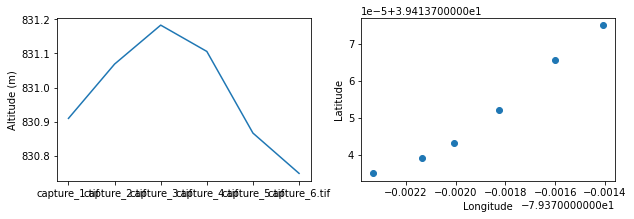

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,3))

ax[0].plot(lt_img_metadata['    GPSAltitude'])
ax[0].set_ylabel('Altitude (m)')

ax[1].scatter(lt_img_metadata['    GPSLongitude'], lt_img_metadata['    GPSLatitude'])
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')

### Take a look at Rrs images to determine masking

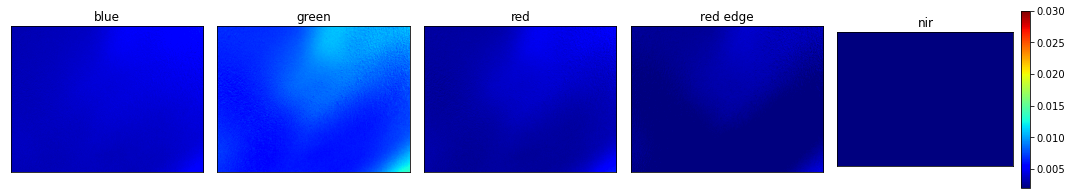

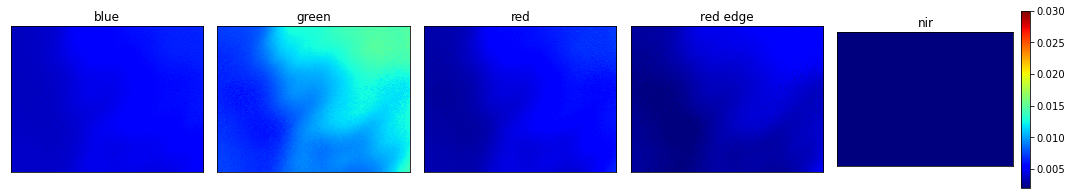

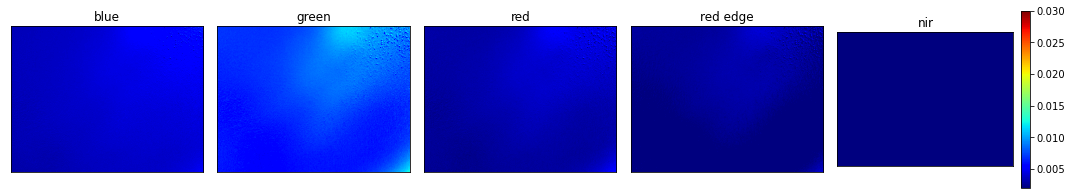

In [137]:
band_names = ['blue', 'green', 'red', 'red edge', 'nir']

for j in random.sample(list(range(len(rrs_imgs_hedley))), 3): #chose random number of images to plot
    fig, ax = plt.subplots(1,5, figsize=(15,4))
    for i in range(5):
        im = ax[i].imshow(rrs_imgs_hedley[j,i],cmap='jet', vmin=0.002, vmax=0.03)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(band_names[i])
    fig.colorbar(im, ax=ax[4], fraction=0.046, pad=0.04)
    cbar.set_label('$R_{rs}\ (sr^{-1}$)', rotation=270, labelpad=15)
    fig.tight_layout() 

### Apply Rrs pixel masking and take a look at images

In [4]:
rrs_pixel_masking(main_dir=project_path, rrs_dir=project_path+'/rrs_hedley', output_dir_name='masked_rrs_hedley', nir_threshold = 0.01, green_threshold = 0.005)
rrs_imgs_hedley_masked, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/masked_rrs_hedley')


Loading ImageSet from: ../../../Broadford_Lake/0000SET/test/raw_water_imgs


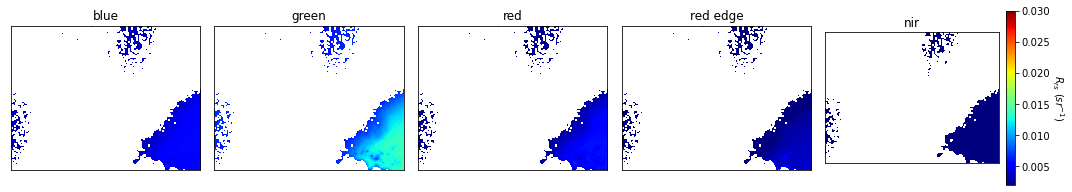

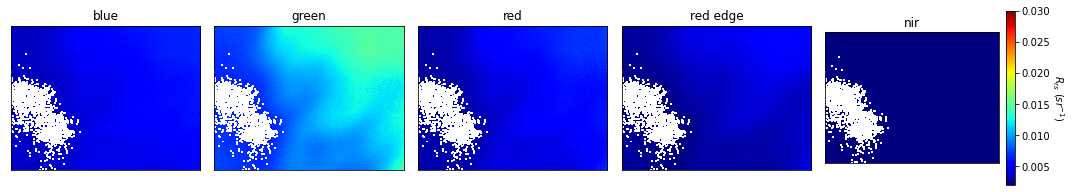

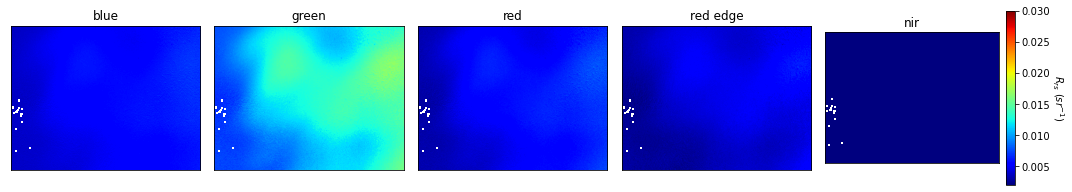

In [131]:
band_names = ['blue', 'green', 'red', 'red edge', 'nir']

for j in random.sample(list(range(len(rrs_imgs_hedley_masked))), 3): #chose random number of images to plot
    fig, ax = plt.subplots(1,5, figsize=(15,4))
    for i in range(5):
        im = ax[i].imshow(rrs_imgs_hedley_masked[j,i],cmap='jet', vmin=0.002, vmax=0.03)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(band_names[i])
    cbar = fig.colorbar(im, ax=ax[4], fraction=0.046, pad=0.04)
    cbar.set_label('$R_{rs}\ (sr^{-1}$)', rotation=270, labelpad=15)
    fig.tight_layout() 

### Plot all spectra

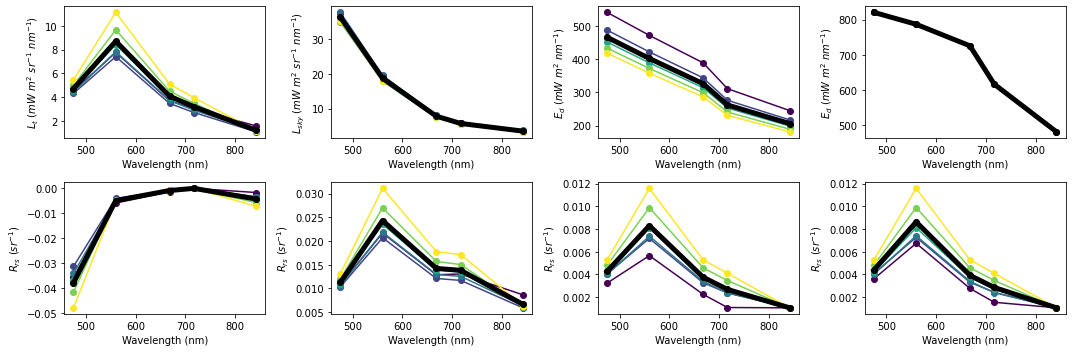

In [109]:
fig, ax = plt.subplots(2,4, figsize=(15,5))

wv = [475, 560, 668, 717, 842]
colors = plt.cm.viridis(np.linspace(0,1,len(lt_imgs)))

#lt
for i in range(len(lt_imgs)):
    ax[0,0].plot(wv, np.nanmean(lt_imgs[i,0:5,:,:],axis=(1,2))*1000,  marker = 'o', color=colors[i], label="")
    ax[0,0].set_xlabel('Wavelength (nm)')
    ax[0,0].set_ylabel('$L_t\ (mW\ m^2\ sr^{-1}\ nm^{-1}$)')   
ax[0,0].plot(wv, np.nanmean(lt_imgs[:,0:5,:,:], axis=(0,2,3))*1000,  marker = 'o', color='black', linewidth=5, label='Average')

#lsky
colors = plt.cm.viridis(np.linspace(0,1,len(lsky_imgs)))

for i in range(len(lsky_imgs)):
    ax[0,1].plot(wv, lsky_imgs[i,0:5,:,:].mean(axis=(1,2))*1000,  marker = 'o', color=colors[i], label="")
    ax[0,1].set_xlabel('Wavelength (nm)')
    ax[0,1].set_ylabel('$L_{sky}\ (mW\ m^2\ sr^{-1}\ nm^{-1}$)')    
ax[0,1].plot(wv, np.nanmean(lsky_imgs[:,0:5,:,:], axis=(0,2,3))*1000,  marker = 'o', color='black', linewidth=5, label='Average')

#dls ed
ed = pd.read_csv(project_path+'/dls_ed.csv')
colors = plt.cm.viridis(np.linspace(0,1,len(ed)))

for i in range(len(ed)):
    ax[0,2].plot(wv, ed.iloc[i,1:6],  marker = 'o', color=colors[i]) #multiply by 1000 to convert to mW
    ax[0,2].set_xlabel('Wavelength (nm)')
    ax[0,2].set_ylabel('$E_d\ (mW\ m^2\ nm^{-1}$)') 
ax[0,2].plot(wv, ed.iloc[:,1:6].mean(axis=0),  marker = 'o', color='black', linewidth=5, label='Average')

#panel ed
ed = pd.read_csv(project_path+'/panel_ed.csv')
colors = plt.cm.viridis(np.linspace(0,1,len(ed)))

for i in range(len(ed)):
    ax[0,3].plot(wv, ed.iloc[i,1:6],  marker = 'o', color=colors[i]) #multiply by 1000 to convert to mW
    ax[0,3].set_xlabel('Wavelength (nm)')
    ax[0,3].set_ylabel('$E_d\ (mW\ m^2\ nm^{-1}$)') 
ax[0,3].plot(wv, ed.iloc[:,1:6].mean(axis=0),  marker = 'o', color='black', linewidth=5, label='Average')


#rrs_imgs_blackpixel
colors = plt.cm.viridis(np.linspace(0,1,len(rrs_imgs_blackpixel)))

for i in range(len(rrs_imgs_blackpixel)):
    ax[1,0].plot(wv, np.nanmean(rrs_imgs_blackpixel[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,0].set_xlabel('Wavelength (nm)')
    ax[1,0].set_ylabel('$R_{rs}\ (sr^{-1}$)')   
ax[1,0].plot(wv, np.nanmean(rrs_imgs_blackpixel[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#rrs_imgs_mobley
colors = plt.cm.viridis(np.linspace(0,1,len(rrs_imgs_mobley)))

for i in range(len(rrs_imgs_mobley)):
    ax[1,1].plot(wv, np.nanmean(rrs_imgs_mobley[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,1].set_xlabel('Wavelength (nm)')
    ax[1,1].set_ylabel('$R_{rs}\ (sr^{-1}$)') 
    
ax[1,1].plot(wv, np.nanmean(rrs_imgs_mobley[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#rrs_imgs_hedley
colors = plt.cm.viridis(np.linspace(0,1,len(rrs_imgs_hedley)))

for i in range(len(rrs_imgs_hedley)):
    ax[1,2].plot(wv, np.nanmean(rrs_imgs_hedley[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,2].set_xlabel('Wavelength (nm)')
    ax[1,2].set_ylabel('$R_{rs}\ (sr^{-1}$)') 
    
ax[1,2].plot(wv, np.nanmean(rrs_imgs_hedley[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#rrs_imgs_hedley_masked
colors = plt.cm.viridis(np.linspace(0,1,len(rrs_imgs_hedley_masked)))

for i in range(len(rrs_imgs_hedley_masked)):
    ax[1,3].plot(wv, np.nanmean(rrs_imgs_hedley_masked[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,3].set_xlabel('Wavelength (nm)')
    ax[1,3].set_ylabel('$R_{rs}\ (sr^{-1}$)') 
    
ax[1,3].plot(wv, np.nanmean(rrs_imgs_hedley_masked[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

fig.tight_layout() 

### Save mean Rrs for each image in dataframe

In [115]:
rrs_blue = []
rrs_green = []
rrs_red = []
rrs_rededge = []
rrs_nir= []

for i in range(len(rrs_imgs_hedley_masked)):
    rrs_blue.append(np.nanmean(rrs_imgs_hedley_masked[i,0,:,:]))
    rrs_green.append(np.nanmean(rrs_imgs_hedley_masked[i,1,:,:]))
    rrs_red.append(np.nanmean(rrs_imgs_hedley_masked[i,2,:,:]))
    rrs_rededge.append(np.nanmean(rrs_imgs_hedley_masked[i,3,:,:]))
    rrs_nir.append(np.nanmean(rrs_imgs_hedley_masked[i,4,:,:]))
    
df = rrs_img_metadata[['SourceFile', '    GPSLatitude', '    GPSLongitude']]
df['rrs_blue'] = rrs_blue
df['rrs_green'] = rrs_green
df['rrs_red'] = rrs_red
df['rrs_rededge'] = rrs_rededge
df['rrs_nir'] = rrs_nir    
df

,SourceFile,GPSLatitude,GPSLongitude,rrs_blue,rrs_green,rrs_red,rrs_rededge,rrs_nir
filename,,,,,,,,
capture_1.tif,../../../Broadford_Lake/0000SET/test/capture_1...,39.413735,-79.372333,0.003610,0.006741,0.002766,0.001543,0.001053
capture_2.tif,../../../Broadford_Lake/0000SET/test/capture_2...,39.413739,-79.372136,0.004087,0.007268,0.003312,0.002417,0.001053
capture_3.tif,../../../Broadford_Lake/0000SET/test/capture_3...,39.413743,-79.372006,0.004010,0.007403,0.003392,0.002395,0.001053
capture_4.tif,../../../Broadford_Lake/0000SET/test/capture_4...,39.413752,-79.371824,0.004213,0.008119,0.003745,0.002687,0.001053
capture_5.tif,../../../Broadford_Lake/0000SET/test/capture_5...,39.413766,-79.371603,0.004804,0.009898,0.004586,0.003467,0.001053
capture_6.tif,../../../Broadford_Lake/0000SET/test/capture_6...,39.413775,-79.371407,0.005275,0.011587,0.005287,0.004096,0.001053


In [ ]:
#save as csv
df.to_csv(project_path + '/mean_rrs.csv')

### Rrs -> Chl/TSM

In [117]:
chl_hu_imgs = chl_hu(Rrsblue=rrs_imgs_hedley_masked[:,0,:,:], Rrsgreen=rrs_imgs_hedley_masked[:,1,:,:], Rrsred=rrs_imgs_hedley_masked[:,2,:,:])
chl_ocx_imgs = chl_ocx(Rrsblue=rrs_imgs_hedley_masked[:,0,:,:], Rrsgreen=rrs_imgs_hedley_masked[:,1,:,:])
chl_hu_ocx_imgs = chl_hu_ocx(Rrsblue=rrs_imgs_hedley_masked[:,0,:,:], Rrsgreen=rrs_imgs_hedley_masked[:,1,:,:], Rrsred=rrs_imgs_hedley_masked[:,2,:,:])
chl_gitelson_imgs = chl_gitelson(Rrsred=rrs_imgs_hedley_masked[:,2,:,:], Rrsrededge=rrs_imgs_hedley_masked[:,3,:,:])
nechad_tsm_imgs = nechad_tsm(Rrsred=rrs_imgs_hedley_masked[:,2,:,:])

### Save mean WQ concentrations for each image in dataframe

In [118]:
chl_hu_values = []
chl_ocx_values = []
chl_hu_ocx_values = []
chl_gitelson_values = []
nechad_tsm_values = []

for i in range(len(rrs_imgs_hedley_masked)):
    chl_hu_values.append(np.nanmean(chl_hu_imgs[i,:,:]))
    chl_ocx_values.append(np.nanmean(chl_ocx_imgs[i,:,:]))
    chl_hu_ocx_values.append(np.nanmean(chl_hu_ocx_imgs[i,:,:]))
    chl_gitelson_values.append(np.nanmean(chl_gitelson_imgs[i,:,:]))
    nechad_tsm_values.append(np.nanmean(nechad_tsm_imgs[i,:,:]))

df['chl_hu'] = chl_hu_values
df['chl_ocx'] = chl_ocx_values
df['chl_hu_ocx'] = chl_hu_ocx_values
df['chl_gitelson'] = chl_gitelson_values
df['nechad_tsm'] = nechad_tsm_values

df

,SourceFile,GPSLatitude,GPSLongitude,rrs_blue,rrs_green,rrs_red,rrs_rededge,rrs_nir,chl_hu,chl_ocx,chl_hu_ocx,chl_gitelson,nechad_tsm
filename,,,,,,,,,,,,,
capture_1.tif,../../../Broadford_Lake/0000SET/test/capture_1...,39.413735,-79.372333,0.003610,0.006741,0.002766,0.001543,0.001053,1.930319,6.197297,6.197297,15.074022,2.645078
capture_2.tif,../../../Broadford_Lake/0000SET/test/capture_2...,39.413739,-79.372136,0.004087,0.007268,0.003312,0.002417,0.001053,1.686529,5.560197,5.560197,25.612614,2.849379
capture_3.tif,../../../Broadford_Lake/0000SET/test/capture_3...,39.413743,-79.372006,0.004010,0.007403,0.003392,0.002395,0.001053,1.808340,6.028073,6.028073,24.286255,2.879090
capture_4.tif,../../../Broadford_Lake/0000SET/test/capture_4...,39.413752,-79.371824,0.004213,0.008119,0.003745,0.002687,0.001053,2.318569,6.521453,6.521453,25.133291,3.011181
capture_5.tif,../../../Broadford_Lake/0000SET/test/capture_5...,39.413766,-79.371603,0.004804,0.009898,0.004586,0.003467,0.001053,4.149222,7.412215,7.412215,27.781769,3.326228
capture_6.tif,../../../Broadford_Lake/0000SET/test/capture_6...,39.413775,-79.371407,0.005275,0.011587,0.005287,0.004096,0.001053,6.448884,8.549397,8.549397,29.169773,3.588528


In [119]:
#save as csv
df.to_csv(project_path + '/mean_rrs_and_wq.csv')

### Map average WQ concentrations 

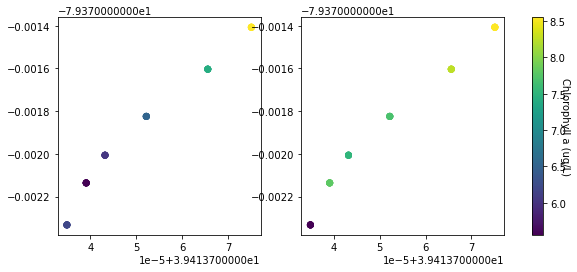

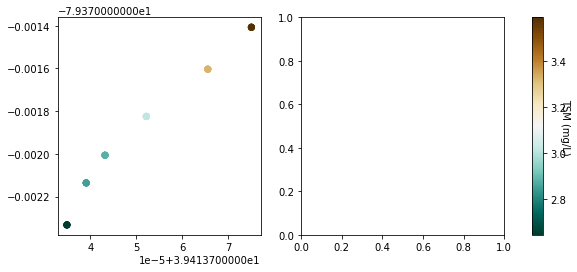

In [157]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
for i in range(len(df)):  
    g = ax[0].scatter(df['    GPSLatitude'], df['    GPSLongitude'], c=df['chl_ocx'])
    ax[1].scatter(df['    GPSLatitude'], df['    GPSLongitude'], c=df['chl_gitelson'])
cbar = fig.colorbar(g, ax=ax)
cbar.set_label('Chlorophyll a (ug/L)', rotation=270)


fig1, ax = plt.subplots(1,2, figsize=(10,4))
for i in range(len(df)):  
    g = ax[0].scatter(df['    GPSLatitude'], df['    GPSLongitude'], c=df['nechad_tsm'], cmap='BrBG_r')
cbar = fig.colorbar(g, ax=ax)
cbar.set_label('TSM (mg/L)', rotation=270)

### Georeferencing 


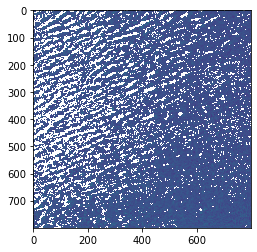

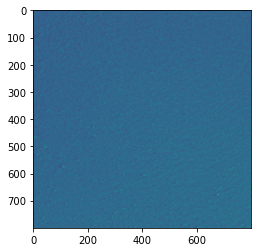

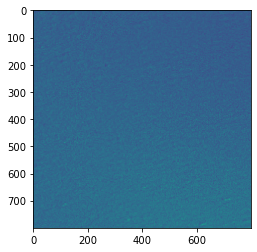

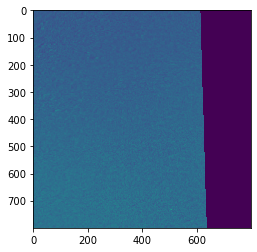

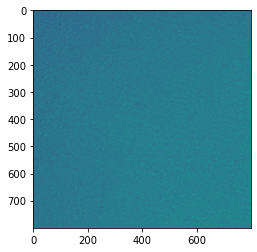

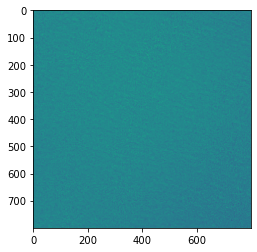

True

In [4]:
georeference(main_dir=project_path, rrs_dir=project_path+'/masked_rrs_hedley', output_dir_name='georeferenced_hedley_rrs', flip=True, plot=True)

#Would be nice to plot these as subplots to save room

(5, 822, 1198)


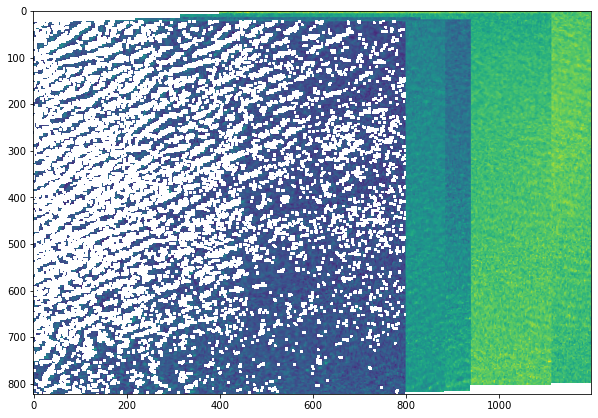

In [9]:
foo = mosaic(main_dir=project_path, img_dir = project_path+'/georeferenced_hedley_rrs', output_name='mosaic', plot=True, save=True, band_to_plot=0)
print(foo.shape)

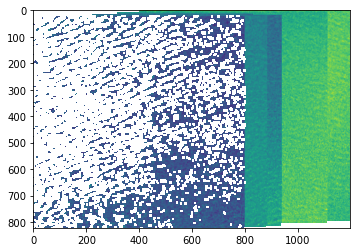

In [11]:
plt.imshow(foo[0,:,:])

#### Trying to figure out plotting points/.tifs over basemap

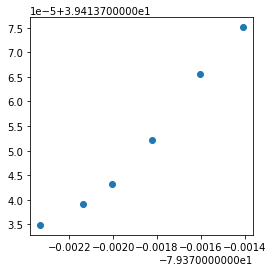

In [48]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(4, 4))

m = Basemap(projection='lcc', resolution='c',
            width=100000, height=100000, 
            lat_0=41, lon_0=-83, epsg=4326)

#m.etopo(scale=0.5, alpha=0.5)
plt.scatter(rrs_img_metadata['    GPSLongitude'], rrs_img_metadata['    GPSLatitude'])

plt.show()


In [38]:
rrs_imgs_hedley_masked, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/masked_rrs_hedley')
rrs_img_metadata


,SourceFile,GPSDateStamp,GPSTimeStamp,GPSLatitude,GPSLatitudeRef,GPSLongitude,GPSLongitudeRef,GPSAltitude,FocalLength,ImageWidth,ImageHeight,GPSImgDirection,GPSPitch,GPSRoll,UTC-Time
filename,,,,,,,,,,,,,,,
capture_1.tif,../../../Broadford_Lake/0000SET/test/capture_1...,2022:09:09,14:31:26,39.413735,N,-79.372333,W,830.910,5.43432,1280,960,-104.755043,10.051656,-10.353182,2022-12-09 14:31:26
capture_2.tif,../../../Broadford_Lake/0000SET/test/capture_2...,2022:09:09,14:31:28,39.413739,N,-79.372136,W,831.069,5.43432,1280,960,-102.999767,5.262329,-9.868161,2022-12-09 14:31:28
capture_3.tif,../../../Broadford_Lake/0000SET/test/capture_3...,2022:09:09,14:31:29,39.413743,N,-79.372006,W,831.183,5.43432,1280,960,-102.912107,12.716979,-9.874853,2022-12-09 14:31:29
capture_4.tif,../../../Broadford_Lake/0000SET/test/capture_4...,2022:09:09,14:31:30,39.413752,N,-79.371824,W,831.106,5.43432,1280,960,-102.934161,15.560780,-11.840869,2022-12-09 14:31:30
capture_5.tif,../../../Broadford_Lake/0000SET/test/capture_5...,2022:09:09,14:31:32,39.413766,N,-79.371603,W,830.867,5.43432,1280,960,-103.214419,12.266589,-16.332490,2022-12-09 14:31:32
capture_6.tif,../../../Broadford_Lake/0000SET/test/capture_6...,2022:09:09,14:31:33,39.413775,N,-79.371407,W,830.749,5.43432,1280,960,-102.863699,10.280256,-16.620142,2022-12-09 14:31:33


In [43]:
import geopandas

# Create point geometries
geometry = geopandas.points_from_xy(rrs_img_metadata['    GPSLongitude'], rrs_img_metadata['    GPSLatitude'])
geo_df = geopandas.GeoDataFrame(
    rrs_img_metadata, geometry=geometry
)

geo_df.head()

,SourceFile,GPSDateStamp,GPSTimeStamp,GPSLatitude,GPSLatitudeRef,GPSLongitude,GPSLongitudeRef,GPSAltitude,FocalLength,ImageWidth,ImageHeight,GPSImgDirection,GPSPitch,GPSRoll,UTC-Time,geometry
filename,,,,,,,,,,,,,,,,
capture_1.tif,../../../Broadford_Lake/0000SET/test/capture_1...,2022:09:09,14:31:26,39.413735,N,-79.372333,W,830.910,5.43432,1280,960,-104.755043,10.051656,-10.353182,2022-12-09 14:31:26,POINT (-79.37233 39.41373)
capture_2.tif,../../../Broadford_Lake/0000SET/test/capture_2...,2022:09:09,14:31:28,39.413739,N,-79.372136,W,831.069,5.43432,1280,960,-102.999767,5.262329,-9.868161,2022-12-09 14:31:28,POINT (-79.37214 39.41374)
capture_3.tif,../../../Broadford_Lake/0000SET/test/capture_3...,2022:09:09,14:31:29,39.413743,N,-79.372006,W,831.183,5.43432,1280,960,-102.912107,12.716979,-9.874853,2022-12-09 14:31:29,POINT (-79.37201 39.41374)
capture_4.tif,../../../Broadford_Lake/0000SET/test/capture_4...,2022:09:09,14:31:30,39.413752,N,-79.371824,W,831.106,5.43432,1280,960,-102.934161,15.560780,-11.840869,2022-12-09 14:31:30,POINT (-79.37182 39.41375)
capture_5.tif,../../../Broadford_Lake/0000SET/test/capture_5...,2022:09:09,14:31:32,39.413766,N,-79.371603,W,830.867,5.43432,1280,960,-103.214419,12.266589,-16.332490,2022-12-09 14:31:32,POINT (-79.37160 39.41377)



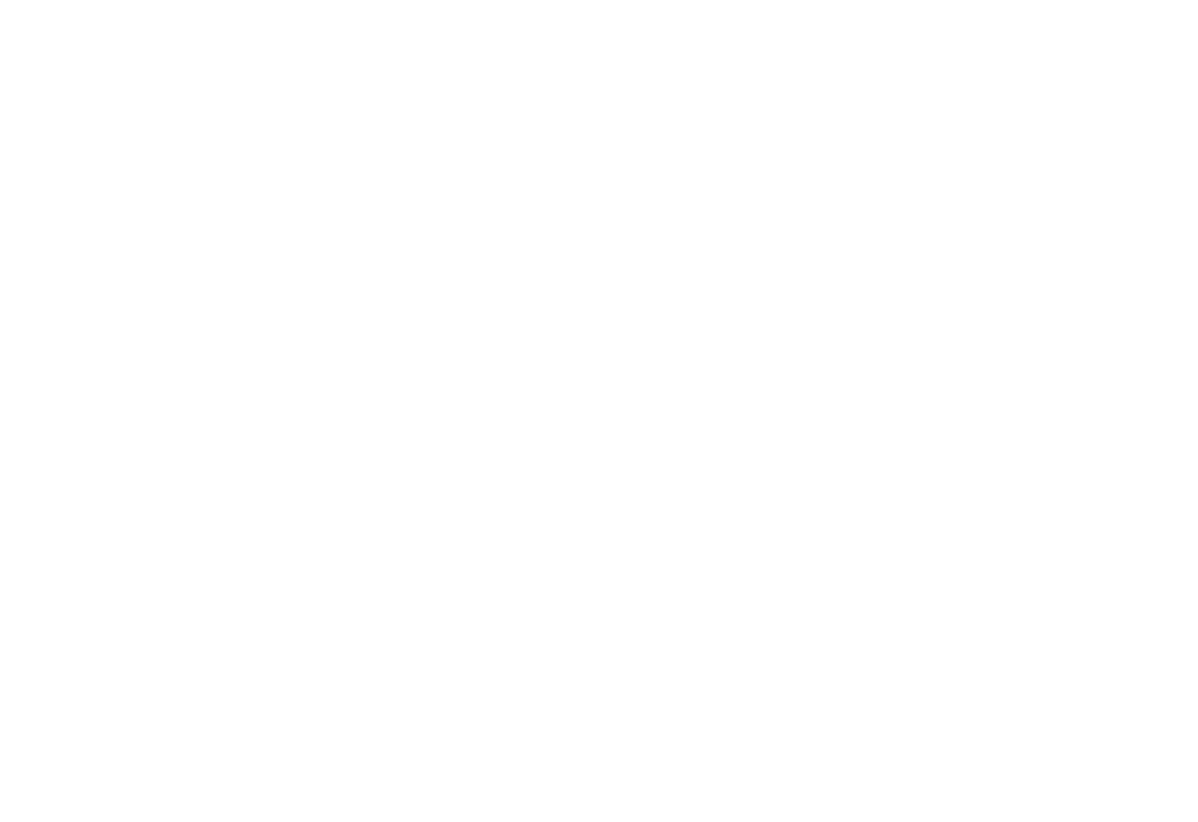

In [52]:
import folium

m = folium.Map(location=[39.4151, -79.3712], 
               tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
               attr= 'ESRI', zoom_start=15)


folium.raster_layers.ImageOverlay(
    image=foo[0,:,:],
    bounds=[[39, -79], [39, -79]],
    colormap=lambda x: (1, 0, 0, x),
).add_to(m)

m

AttributeError: 'Map' object has no attribute 'plot'

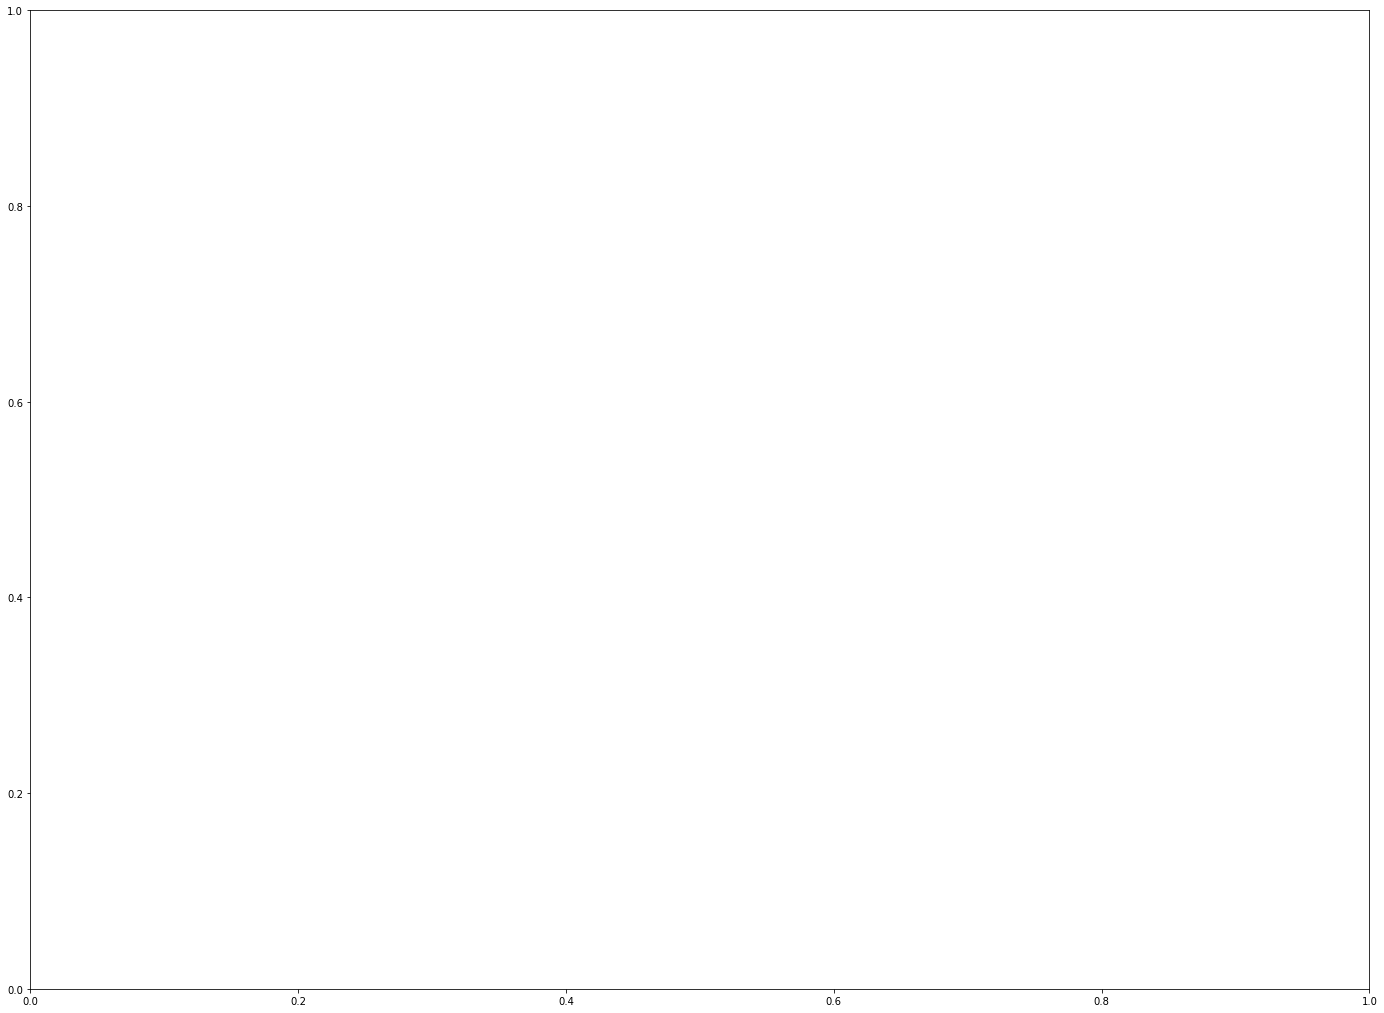

In [44]:
fig, ax = plt.subplots(figsize=(24, 18))
m.plot(ax=ax, alpha=0.4, color="grey")
geo_df.scatter(rrs_img_metadata.geometry, ax=ax, legend=True)
plt.title("Volcanoes")